In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [5]:
df = pd.read_csv('Telco-Customer-Churn.csv')


In [6]:

df.drop('customerID', axis=1, inplace=True)
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col])


In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
def build_model(dropout=False):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    if dropout:
        model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    if dropout:
        model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [10]:
model_no_dropout = build_model(dropout=False)
history_no = model_no_dropout.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=0)

model_dropout = build_model(dropout=True)
history_do = model_dropout.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=0)


In [11]:
loss_no, acc_no = model_no_dropout.evaluate(X_test, y_test, verbose=0)
loss_do, acc_do = model_dropout.evaluate(X_test, y_test, verbose=0)


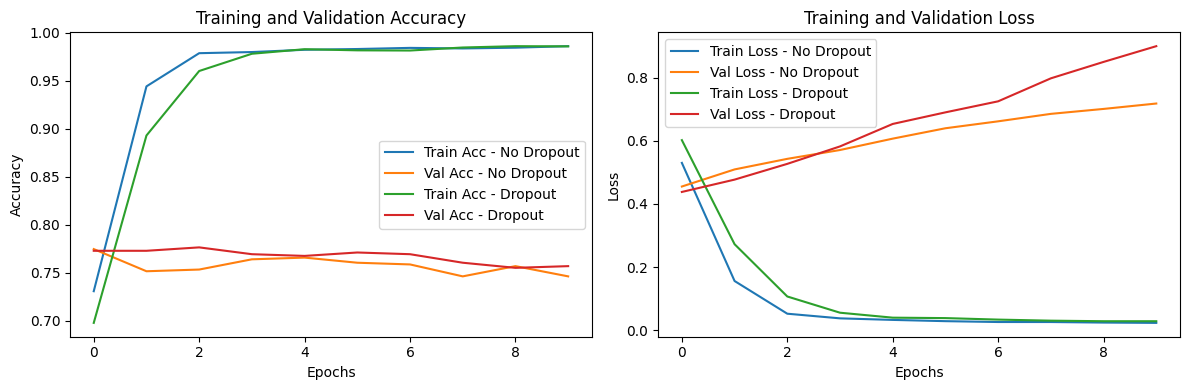

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_no.history['accuracy'], label='Train Acc - No Dropout')
plt.plot(history_no.history['val_accuracy'], label='Val Acc - No Dropout')
plt.plot(history_do.history['accuracy'], label='Train Acc - Dropout')
plt.plot(history_do.history['val_accuracy'], label='Val Acc - Dropout')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_no.history['loss'], label='Train Loss - No Dropout')
plt.plot(history_no.history['val_loss'], label='Val Loss - No Dropout')
plt.plot(history_do.history['loss'], label='Train Loss - Dropout')
plt.plot(history_do.history['val_loss'], label='Val Loss - Dropout')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
results_df = pd.DataFrame({
    "Model": ["Without Dropout", "With Dropout"],
    "Test Accuracy": [acc_no, acc_do],
    "Test Loss": [loss_no, loss_do]
})
print("\n🔎 Test Accuracy and Loss Comparison:\n")
print(results_df)



🔎 Test Accuracy and Loss Comparison:

             Model  Test Accuracy  Test Loss
0  Without Dropout       0.688699   0.843868
1     With Dropout       0.710021   1.028059
